In [18]:
from data_processing_functions import *
from time import time

In [19]:
objects_to_test = ["AngleTubes","Ears","Gameboys"]
validation_measures = ["f1","precision","recall","accuracy"]
csv_path = "/home/jens/masterData/AlgorithmTuner/BO_Tuned_5_5_individual-AlgorithmTunerData-data.csv"
df = pd.read_csv(csv_path, usecols = ["algName","objName","geName","tp","tn","fp","fn"]+validation_measures, dtype = {"algName":"category","objName":"category","geName":"category"})
df = df[df["objName"].isin(objects_to_test)]
df["objName"].cat.remove_unused_categories(inplace=True)

df =  df.groupby(["algName","objName"]).sum().reset_index()
df["precision"]=df["tp"]/(df["tp"]+df["fp"])
df["recall"]=df["tp"]/(df["tp"]+df["fn"])
df["f1"]=2*df["tp"]/(2*df["tp"]+df["fn"]+df["fp"])
df["accuracy"]=(df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df[["precision","recall","f1","accuracy"]].fillna(0,inplace=True)

/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


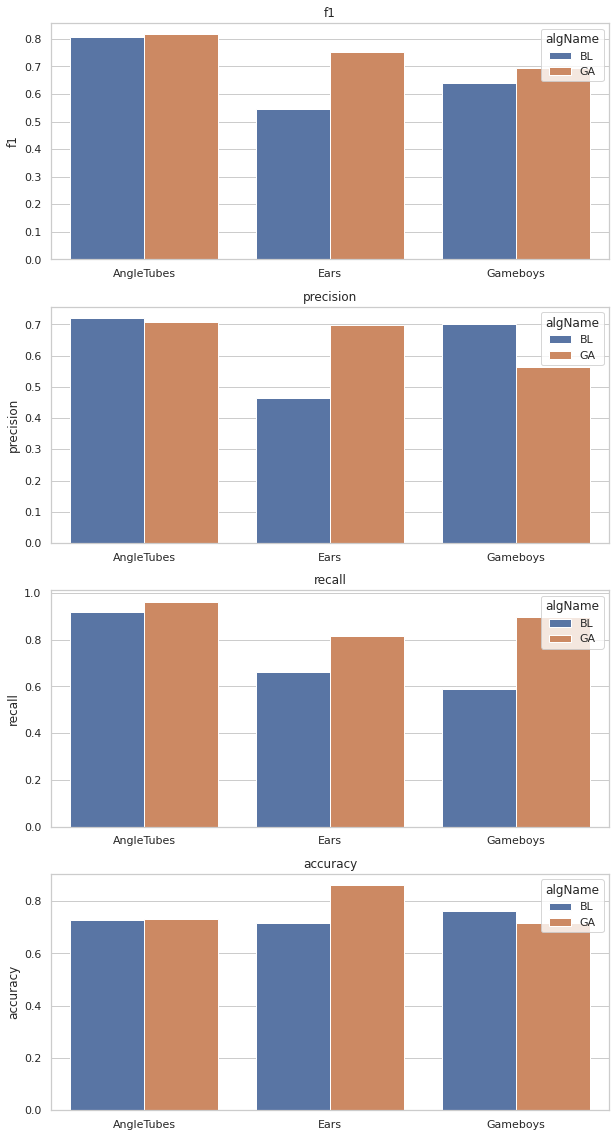

In [20]:

fig,axes = plt.subplots(len(validation_measures),1,figsize=(10,len(validation_measures)*5),sharey="row")
sns.set_theme(style="whitegrid")
for ax,vm in zip(axes,validation_measures):
    sns.barplot(x="objName",y=vm,hue="algName",data=df,ax=ax)
    ax.set_title(vm)
    ax.set_xlabel("")

In [10]:
gb = df.groupby(["objName"])
for group in gb.groups:
    print("\n"+group)
    print(gb.get_group(group,df)[["algName","f1","precision","recall","accuracy"]].T.to_string(header=None))
    df.style.highlight_max(color = 'lightgreen', axis = 0)

    



AngleTubes
algName          BL        GA
f1         0.766958  0.768113
precision  0.721402  0.706131
recall     0.926359  0.950281
accuracy   0.727012  0.718004

Ears
algName          BL        GA
f1         0.548778  0.524231
precision  0.519345  0.564583
recall     0.640625  0.520833
accuracy    0.73095   0.80062

Gameboys
algName          BL        GA
f1         0.636751  0.649001
precision  0.723684  0.563095
recall     0.634211  0.858772
accuracy   0.773763  0.694011
